# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey
# **Actividad KMeans**
#### Josías Ruiz - A00968460
##### Dr. María de La Paz Rico

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

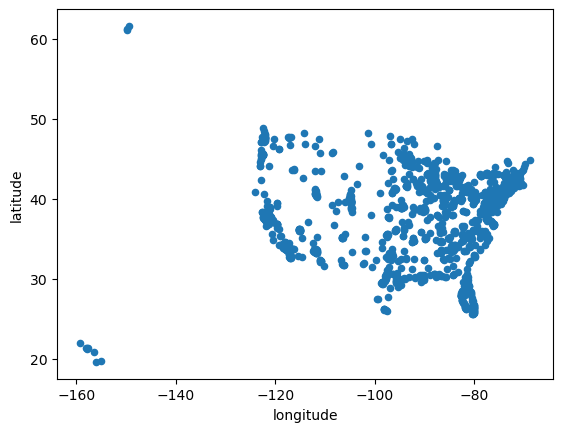

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

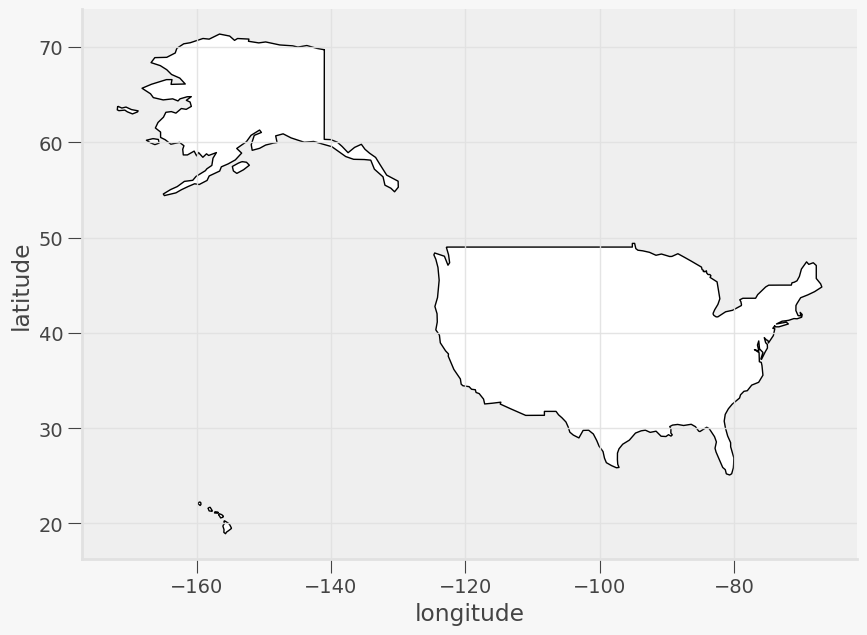

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

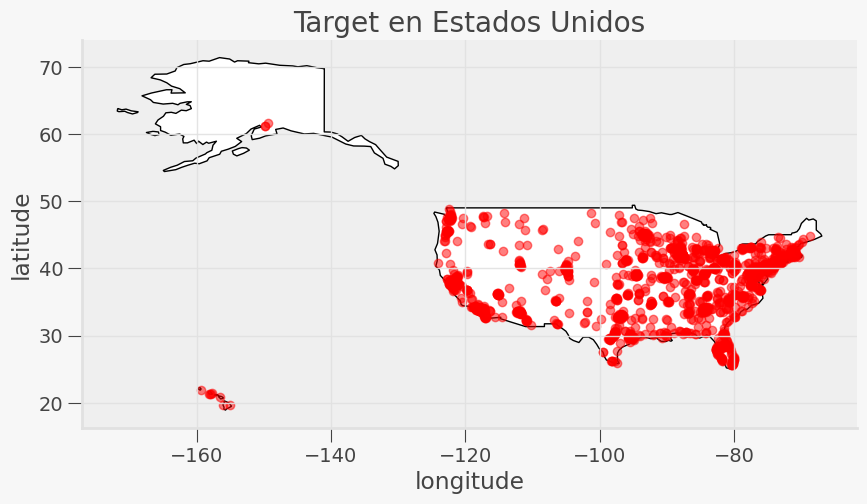

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

Encuentra las latitudes y longitudes de los almacenes,

¿qué ciudad es?, 

¿a cuantas tiendas va surtir?, 

¿sabes a que distancia estará? 

¿Cómo elegiste el número de almacenes?

justifica tu respuesta técnicamente. 

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿pueden ayudar a graficar este tipo de datos? 

¿Consideras importante que se grafique en un mapa?, 

¿por qué? Agrega las conclusiones

¿Que es un cluster?
Es una agrupacion de elementos, en este caso de los puntos que representan las tiendas, para este caso podemos visualizar agrupamientos por regiones.

C:\Users\josia\anaconda3\envs\MNA\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


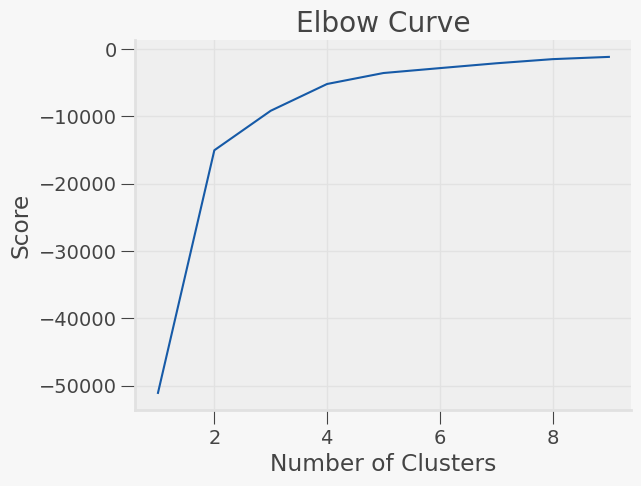

In [16]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

X_axis = latlong[['longitude']]
Y_axis = latlong[['latitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#Dangeti, P. (2017). The elbow method. In Statistics for Machine Learning. Birmingham, UK: O´REILLY.
#https://learning.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml#:~:text=The%20elbow%20method%20is%20used,by%20different%20values%20of%20k.

In [83]:
kmeans = KMeans(n_clusters = 5, init ='k-means++') 
kmeans.fit(latlong[latlong.columns[0:2]])
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 2, 2, 1])

In [84]:
X = df[["longitude","latitude"]]

Mkmeans = KMeans(n_clusters=5).fit(X)
centroids = Mkmeans.cluster_centers_
labels = Mkmeans.predict(X) 

C = Mkmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C

,0,1,Coordinates
0,-88.769587,41.786339,POINT (-88.76959 41.78634)
1,-119.176343,37.579774,POINT (-119.17634 37.57977)
2,-75.652554,40.342401,POINT (-75.65255 40.34240)
3,-82.945231,31.159353,POINT (-82.94523 31.15935)
4,-98.400013,33.952931,POINT (-98.40001 33.95293)


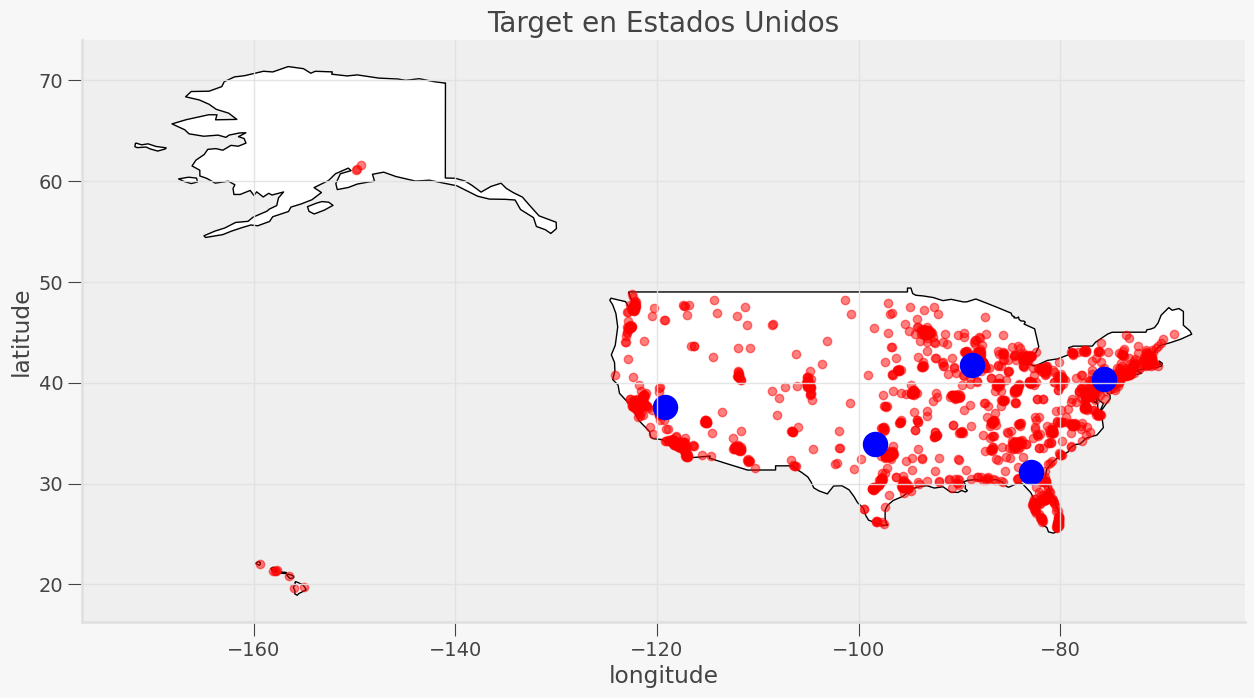

In [85]:
fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='red', alpha = 0.5) 
gdf_C.plot(ax=gax, color='blue', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [30]:
# ¿a cuantas tiendas va surtir? 
latlong.loc[:,'kmeans'].value_counts()

0    482
2    419
1    368
3    296
4    274
Name: kmeans, dtype: int64

In [31]:
gdf_C

,0,1,Coordinates
0,-119.176343,37.579774,POINT (-119.17634 37.57977)
1,-75.634656,40.329142,POINT (-75.63466 40.32914)
2,-98.266337,34.420357,POINT (-98.26634 34.42036)
3,-88.399267,41.776347,POINT (-88.39927 41.77635)
4,-82.944531,31.085527,POINT (-82.94453 31.08553)


In [86]:
from pandas.core.internals.concat import concat_arrays

Locations=[]
for i in range(5):
    Locations.append([str(gdf_C[1][i]) + ", " + str(gdf_C[0][i])])

1 - Condado de Clinch, Georgia, EE. UU.

2 - Chawanakee Joint Elementary, California, EE. UU.

3 - Walters, Oklahoma, EE. UU.

4 - Municipio de Douglass, Pensilvania, EE. UU.

5 - Aurora, Illinois, EE. UU.

In [39]:
LocationsLst = []
for Location in Locations:
    LocationsLst.append(Location[0])
LocationsLst

['37.57977423831522, -119.17634307255435',
 '40.32914233457557, -75.63465581594203',
 '34.42035677094595, -98.26633715912162',
 '41.77634657238095, -88.39926685738095',
 '31.08552671139706, -82.94453070330881']

In [54]:
#Ciudades

from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="Locator")

for coords in LocationsLst:
  loc = geolocator.reverse(coords)
  print('Centro de distribución en - ', loc.address)

Centro de distribución en -  Iron Lake Trail, Madera County, California, United States
Centro de distribución en -  356, East 3rd Street, Boyertown, Berks County, Pennsylvania, 19512, United States
Centro de distribución en -  County Road E1790, Cotton County, Oklahoma, United States
Centro de distribución en -  Aurora West Forest Preserve, Virgil Gilman Trail, Sugar Grove, Sugar Grove Township, Kane County, Illinois, 60554, United States
Centro de distribución en -  Clinch County, Georgia, United States


In [74]:
#Distancias

for i in range(5):
    for j in range(i+1,5):
        distancia = round(geodesic(LocationsLst[i], LocationsLst[j]).miles/1.16,2)
        print("Distancia entre almacen #", str(i) ," y almacen #", str(j), " es: ", distancia, " [Km]")

Distancia entre almacen # 0  y almacen # 1  es:  2007.97  [Km]
Distancia entre almacen # 0  y almacen # 2  es:  1024.97  [Km]
Distancia entre almacen # 0  y almacen # 3  es:  1428.37  [Km]
Distancia entre almacen # 0  y almacen # 4  es:  1815.44  [Km]
Distancia entre almacen # 1  y almacen # 2  es:  1126.05  [Km]
Distancia entre almacen # 1  y almacen # 3  es:  580.67  [Km]
Distancia entre almacen # 1  y almacen # 4  es:  653.17  [Km]
Distancia entre almacen # 2  y almacen # 3  es:  636.54  [Km]
Distancia entre almacen # 2  y almacen # 4  es:  793.35  [Km]
Distancia entre almacen # 3  y almacen # 4  es:  686.98  [Km]


Selecionamos 5 almacenes considerando la grafica de elbow, ya que representan el mejor balance con máxima covertura. Al graficar estos clusters geograficamente se pueden ubicar en el territorio de US, al añadir más de 5, calcula una ubicación adicional pero sobre el mar, que en términos prácticos no es posible. Esto pudo observarse gracias al gráfico sobre el mapa de otra manera este tipo de detalles se vuelven dificiles de apreciar unicamente con valores numéricos.
